# Principal components analysis (PCA)

## Goals

* Understand how PCA is computed
* Visualize a single-cell dataset with PCA
* Understand how different biological axes of variation are separated into different components

In [ ]:
!pip install scprep

## 1. Computing PCA on the UCI wine dataset

#### How does PCA work?

PCA related eigendecomposition methods are some of the most fundamental dimensionality reduction tools in data science. Many methods, including tSNE and PHATE, first reduce the data using PCA before performing further operations on the data. 

You can find many rigorous descriptions of the PCA algorithm online. Here, we will focus on the intutition. The goal of PCA is to identify a set of orthogonal dimensions (each of which is a linear combination of the input features) that explain the maximum variance in the data. These dimensions are called Principle Components. In the following figure, you can see data in two dimensions:

<img src="https://krishnaswamylab.github.io/img/how_to_single_cell/PCA_original_data.png" style="height: 25rem;"/>

This is a simple dataset where the data exists in two dimensions. The axis of maximum variance in this data is going to be some line that goes up and to the right. If you were to identify the first two principle components in this data they would look like the dashed grey lines in the following figure:

<img src="https://krishnaswamylab.github.io/img/how_to_single_cell/PCA_PC1.png" style="height: 35.35rem;"/>

PCA then projects the points onto these new axes. Above, we see the projection onto PC1 (the longest dashed line) for a handful of cells denoted by the red arrows. Note that the arrows are orthogonal (perpendicular) to PC1. This is the definition of projection. Below, you can see what the projection of the data onto the first principle component would look like. Here we're doing the simplest dimensionality reduction. We've taken the data from two dimensions to 1 dimension. Notice how some information is lost here. Some points are very close on PC1 that are far in the original data space. Some information loss is unavoidable when reducing dimensions. Notice that if we considered a second PC, we would get that information back.

Visualization is a game of deciding what information you want to keep, and what you're comfortable throwing away. Here, we're looking at two dimensional data, but scRNA-seq usually has 20-30K data points. Some information will definitely be lost when considering only 1 or 2 principle components.

**Note:** There exist as many PCs as there are original dimensions of the data, but we usually only consider the first 50-500 for single cell data. 


In [1]:
import scprep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.preprocessing
import sklearn.datasets

#### Load the data

In [2]:
wine = sklearn.datasets.load_wine()

# Access the numerical data from the wine Bunch
data = wine['data']

# Load data about the rows and columns
feature_names = wine['feature_names']

# Load cultivar information about each wine
cultivars = np.array(['Cultivar{}'.format(cl) for cl in wine['target']])

# Create nice names for each row
wine_names = np.array(['Wine{}'.format(i) for i in range(data.shape[0])])

# use the sklearn StandardScaler to scale to mean 0, variance 1
data = sklearn.preprocessing.StandardScaler().fit_transform(data)

# Gather all of this information into a DataFrame
data = pd.DataFrame(data, columns=feature_names, index=wine_names)

# Print the first 5 rows of the data, eq. to data[:5]
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Wine0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
Wine1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
Wine2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
Wine3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
Wine4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


#### Compute PCA manually

Text(0, 0.5, 'Explained Variance')

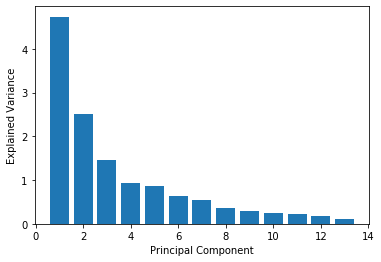

In [3]:
# compute the sample covariance matrix
Sigma = np.cov(np.transpose(data))

# compute the eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(Sigma)

# sort the eigenvectors in order of decreasing eigenvalue
order = np.argsort(eigenvalues)[::-1] # [::-1] reverses the order of a list
eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:,order]

# plot the eigenvalues
plt.bar(np.arange(len(eigenvalues))+1, eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

In [4]:
# =============
# How many principal components do you think are meaningful in this dataset?
n = 3
# =============

# take only the first n eigenvectors and eigenvalues
eigenvectors, eigenvalues = eigenvectors[:,:n], eigenvalues[:n]

# project the data onto the principal directions by matrix multiplication
data_pca = data @ eigenvectors

data_pca.head()

,0,1,2
Wine0,-3.316751,1.443463,0.165739
Wine1,-2.209465,-0.333393,2.026457
Wine2,-2.516740,1.031151,-0.982819
Wine3,-3.757066,2.756372,0.176192
Wine4,-1.008908,0.869831,-2.026688


In [5]:
my_cultivar = "Cultivar0" # alternative: "Cultivar1", "Cultivar2"

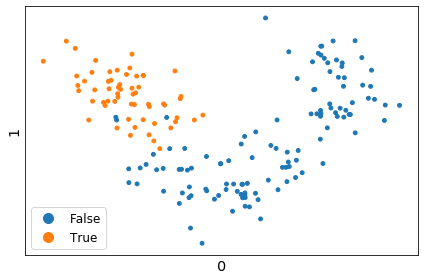

In [6]:
scprep.plot.scatter(x=data_pca[0], y=data_pca[1],
                    c=cultivars==my_cultivar, ticks=False)

### Exercise 1 - pick through the first few principal components and see which best separate your chosen cultivar

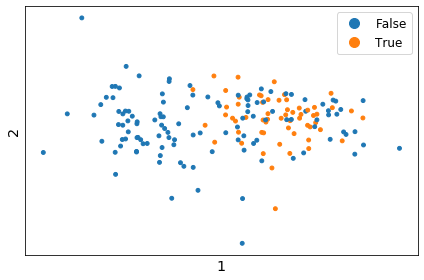

In [8]:
# =====================
# Use scprep.plot.scatter to plot different principal components
scprep.plot.scatter(x=data_pca[1],
                    y=data_pca[2],
                    c=cultivars==my_cultivar, ticks=False)
# =====================

## 2. Downloading the Retinal Bipolar dataset


Alternatively, you may load your own data by replacing the Google Drive file ids with your own file ids.

Note that if you do, you will likely not have annotated celltype labels yet. Replace all references to `metadata['CELLTYPE']` with an entry from `metadata`, or your favorite gene.

In [9]:
# download the data from Google Drive
scprep.io.download.download_google_drive("1QGkqL_FF7iveR1TLZ8HJKBANOmugBxlm",
                                         "retinal_bipolar.zip")
scprep.io.download.unzip("retinal_bipolar.zip")

In [10]:
# read in the data
data = scprep.io.load_mtx("retinal_bipolar/matrix.mtx",
                         cell_names="retinal_bipolar/cell_names.tsv",
                         gene_names="retinal_bipolar/gene_names.tsv")
data.head()

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610025J13Rik,...,n-R5s77,n-R5s8,n-R5s85,n-R5s86,n-R5s87,n-R5s88,n-R5s92,n-R5s93,n-R5s95,n-R5s96
Bipolar1_CCCACAAGACTA,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_TCGCCTCGTAAG,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_CAAAGCATTTGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_CTTTTGATTGAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_GCTCCAATGACA,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# read in the cluster labels
metadata = scprep.io.load_tsv("retinal_bipolar/metadata.tsv")
metadata.head()

/opt/anaconda3/lib/python3.7/site-packages/scprep/sanitize.py:53: RuntimeWarning: Data is not numeric. Many scprep functions will not work.
  RuntimeWarning,


,CLUSTER,SUB-CLUSTER,CELLTYPE
Bipolar1_CCCACAAGACTA,11.0,11,BC5D
Bipolar1_TCGCCTCGTAAG,23.0,23,23
Bipolar1_CAAAGCATTTGC,5.0,5,BC6
Bipolar1_CTTTTGATTGAC,4.0,4,BC7
Bipolar1_GCTCCAATGACA,1.0,1,Rod BC


In [12]:
data.head()

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610025J13Rik,...,n-R5s77,n-R5s8,n-R5s85,n-R5s86,n-R5s87,n-R5s88,n-R5s92,n-R5s93,n-R5s95,n-R5s96
Bipolar1_CCCACAAGACTA,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_TCGCCTCGTAAG,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_CAAAGCATTTGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_CTTTTGATTGAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bipolar1_GCTCCAATGACA,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
metadata.head()

,CLUSTER,SUB-CLUSTER,CELLTYPE
Bipolar1_CCCACAAGACTA,11.0,11,BC5D
Bipolar1_TCGCCTCGTAAG,23.0,23,23
Bipolar1_CAAAGCATTTGC,5.0,5,BC6
Bipolar1_CTTTTGATTGAC,4.0,4,BC7
Bipolar1_GCTCCAATGACA,1.0,1,Rod BC


In [14]:
data.shape

(44994, 24904)

## 3. Preprocessing

You should be familiar with the preprocessing workflow from earlier, but we'll walk through it step by step anyway.

#### Library size filtering

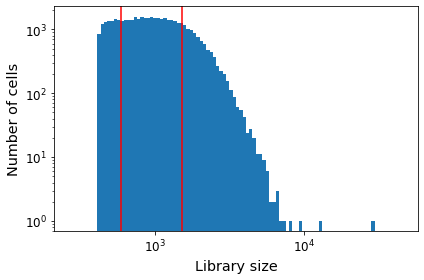

In [15]:
scprep.plot.plot_library_size(data, percentile=(20,80))

Notice that there are no cells with library size smaller than ~500. This dataset has already been filtered for library size, so we don't _need_ to do anything, but for speed and memory concerns we'll filter it a bit more aggressively.

In [16]:
data, metadata = scprep.filter.filter_library_size(data, metadata, percentile=(20,80))

#### Library size normalization

In [17]:
data = scprep.normalize.library_size_normalize(data)

#### Mitochondrial DNA filtering

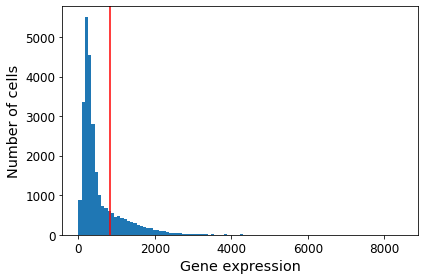

In [18]:
scprep.plot.plot_gene_set_expression(data, starts_with="mt-", percentile=80)

There is a long tail of high mitochondrial expression. Since we normalized library size to 10,000, a mitochondrial expression of 8,000 means nearly the entire droplet was mitochondrial. We should remove these.

In [19]:
data, metadata = scprep.filter.filter_gene_set_expression(
    data, metadata, starts_with="mt-", keep_cells='below', percentile=80)
data.shape

(21552, 24904)

#### Rare gene filtering

Now we've removed some cells, it's likely that there are some genes with close to zero total counts. These are just a waste of space.

In [20]:
data = scprep.filter.filter_rare_genes(data, min_cells=10)
data.shape

(21552, 15524)

#### Square root transform

In [21]:
data = scprep.transform.sqrt(data)

#### Saving processed files

Let's make a habit of storing the preprocessed data. We'll use this again later.

In [22]:
data.to_pickle("retinal_bipolar_data.pickle.gz")
metadata.to_pickle("retinal_bipolar_metadata.pickle.gz")

## 4. PCA

This dataset consists of many cell types, which were mostly identified as Amacrine cells, Muller Glia, Rod Bipolar cells, and many subtypes of Cone Bipolar cells in [Shekhar et. al, 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5003425/). 

#### Separating celltypes by selecting appropriate plotting features

In [23]:
metadata['CELLTYPE'].unique()

array(['BC5A', 'BC1B', 'BC6', 'Rod BC', 'BC3B', 'Muller Glia', 'BC5B',
       '21', '19', 'BC5C', 'BC3A', 'BC5D', 'BC7', 'BC2', 'BC1A', '17',
       'BC4', '18', 'BC8/9_1', '23', '-1', '24', 'BC8/9_2', 'Rod PR',
       'Amacrine_2', 'Amacrine_1', 'Cone PR', '26', '25'], dtype=object)

First, let's try to separate out the Muller Glia cells from the rest of the dataset using a couple of known marker genes.

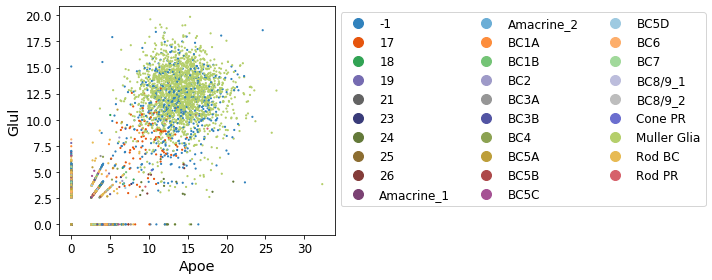

In [24]:
scprep.plot.scatter(data['Apoe'], data['Glul'], c=metadata['CELLTYPE'],
                    figsize=(10,4), legend_anchor=(1,1))

Notice that the Muller Glia cells are mostly separate from the rest, except for a smattering of cells labelled '-1'. These cells were not assigned a cluster in the original study, so let's see what the plot looks like without them.

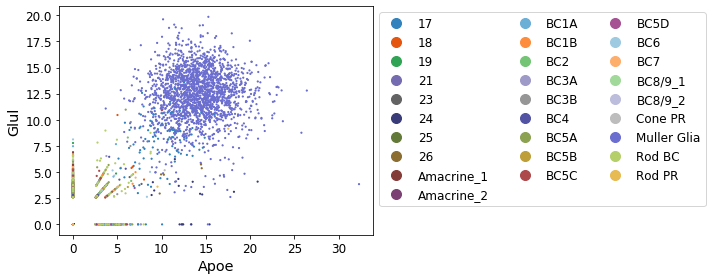

In [25]:
scprep.plot.scatter(data['Apoe'], data['Glul'], c=metadata['CELLTYPE'],
                    mask=metadata['CELLTYPE'] != '-1',
                    figsize=(10,4), legend_anchor=(1,1))

Okay, so the Muller Glia cells are relatively easy to identify using this combination of genes. But how should we choose such combinations of genes? With 20,000 to choose from, it's no easy feat. This is where PCA comes in.

#### Computing PCA quickly

There's a faster way to do PCA, and fortunately it's already implemented for us in `scikit-learn` and `scprep`.

In [26]:
# first, we'll filter out those unlabeled cells
data, metadata = scprep.select.select_rows(data, metadata, idx=metadata['CELLTYPE'] != '-1')

import sklearn.decomposition
pca_op = sklearn.decomposition.PCA(n_components=100) # we could also do scprep.reduce.pca(data, 100)
data_pca = pca_op.fit_transform(scprep.utils.toarray(data))
data_pca

array([[-1.72277546, 15.83948936,  4.27379656, ...,  4.32034423,
        -1.5199414 , -1.72685853],
       [ 0.6189253 , 12.84302246, -2.85684798, ...,  2.38194876,
        -0.86948663,  1.48937426],
       [ 0.89890891,  6.57228168, 17.78928608, ...,  2.85356485,
         3.31622792, -1.72379219],
       ...,
       [-0.90173738, 10.82703838, -0.826598  , ..., -2.26331544,
         0.05981876, -2.0108863 ],
       [-0.63963636,  9.59975418, -1.6028497 , ...,  4.13193814,
         3.00957179, -2.37563155],
       [-0.99938247,  9.87576752, -4.40313667, ...,  1.31377301,
         0.5349908 ,  0.55328984]])

Note that since we used `sklearn` here, `data_pca` is a numpy array, not a DataFrame. We could have avoided this conversion by using `scprep.reduce.pca`, but `sklearn` has some additional functionality that we will use later.

#### Examining the first two principal components

Now we have computed the PCA, we can plot the first two directions to see how well our glial cells separate.

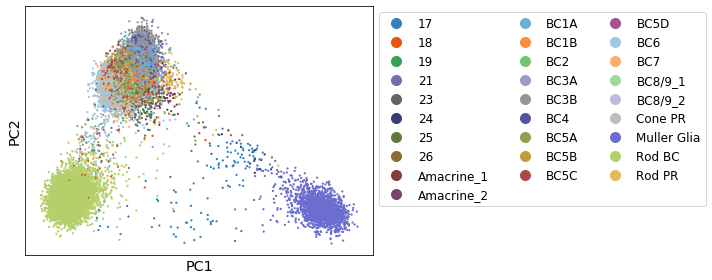

In [27]:
scprep.plot.scatter2d(data_pca, c=metadata['CELLTYPE'], figsize=(10,4),
                      ticks=False, label_prefix='PC', legend_anchor=(1,1))

Wow, look at that! The glial cells separate perfectly from the Rod Bipolar cells (lime green) and the Cone Bipolar cells (most everything else).

### Exercise 2 - Examining principal components

Each principal component can be thought of as representing some latent state in the data. For example, we see that the first component largely separates glia from bipolar cells, and the second separates rod bipolar cells from cone bipolar cells. 

**Now it's your turn** - pick a cell type and try to find the best principal component to separate it from the rest of the cells.

In [28]:
print(metadata['CELLTYPE'].unique())

['BC5A' 'BC1B' 'BC6' 'Rod BC' 'BC3B' 'Muller Glia' 'BC5B' '21' '19' 'BC5C'
 'BC3A' 'BC5D' 'BC7' 'BC2' 'BC1A' '17' 'BC4' '18' 'BC8/9_1' '23' '24'
 'BC8/9_2' 'Rod PR' 'Amacrine_2' 'Amacrine_1' 'Cone PR' '26' '25']


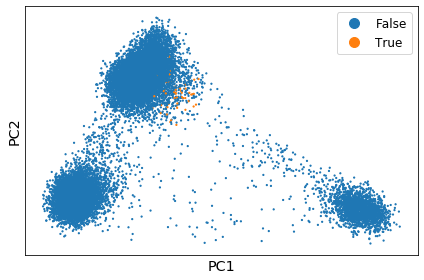

In [29]:
# ================
# pick any named cell type
my_celltype = 'Amacrine_1'
# pick a principal component (a number >=1) to put on the x axis
x_pc = 1
# pick a principal component to put on the y axis
y_pc = 2
# ===============
scprep.plot.scatter(data_pca[:,x_pc-1], data_pca[:,y_pc-1], c=metadata['CELLTYPE'] == my_celltype,
                   ticks=False, xlabel='PC{}'.format(x_pc), ylabel='PC{}'.format(y_pc))

#### Examining loadings associated with principal components

The principal components are described by a linear combination of the original features, so we can use the coefficients of these principal directions (called "loadings") to understand which features are driving the separation. We'll do it here for the first two components.

In [30]:
pc_loadings = pd.DataFrame(pca_op.components_, columns=data.columns)
pc_loadings.head()

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610030E20Rik,...,mt-Tl1,mt-Tl2,mt-Tm,mt-Tp,mt-Tq,mt-Ts2,mt-Tt,mt-Tv,mt-Tw,mt-Ty
0,0.000084,0.002169,-0.001397,0.002310,0.000015,0.001371,-0.001470,-0.000044,0.000915,0.000170,...,-0.000080,0.000014,-0.000515,-0.001998,-0.000153,-0.000144,-0.000299,-0.000098,-0.000147,-0.000165
1,-0.000062,0.002681,-0.001601,-0.001495,-0.000358,0.000474,0.001274,-0.000032,0.000127,0.000029,...,0.000016,0.000080,-0.000029,-0.001670,-0.000028,0.000096,-0.000190,0.000145,-0.000204,-0.000010
2,-0.000027,-0.003889,-0.005795,0.000204,-0.000682,-0.001544,0.001007,0.000039,-0.002309,0.000483,...,0.000109,0.000057,-0.000220,0.002370,0.000122,0.000145,0.000074,0.000106,-0.000084,0.000176
3,0.000192,-0.001237,-0.000504,-0.000056,-0.000546,0.001529,0.000178,-0.000031,-0.000924,0.001962,...,0.000094,-0.000119,0.000610,0.001078,0.000258,-0.000260,0.000246,0.000045,0.000064,0.000202
4,0.000255,-0.000096,-0.005943,0.000612,-0.000557,0.000192,0.002552,-0.000185,-0.005831,0.005755,...,-0.000297,-0.000168,-0.000497,0.001469,0.000690,-0.000124,-0.000761,-0.000098,-0.000306,0.000107


In [31]:
# find the top genes associated with PC1
top_genes = np.abs(pc_loadings.loc[0]).sort_values(ascending=False)
top_genes.head(20)

Calm1     0.253430
Apoe      0.243300
Glul      0.209790
Pcp2      0.208732
Trpm1     0.156030
Acsl3     0.142262
Clu       0.134691
Dkk3      0.132221
Gng13     0.129157
Rlbp1     0.127997
Malat1    0.124457
Pcp4      0.120903
Chgb      0.119972
Sparc     0.112543
Gnao1     0.096658
Slc1a3    0.092690
Isl1      0.092633
Jun       0.090011
Dbi       0.089774
Car2      0.088967
Name: 0, dtype: float64

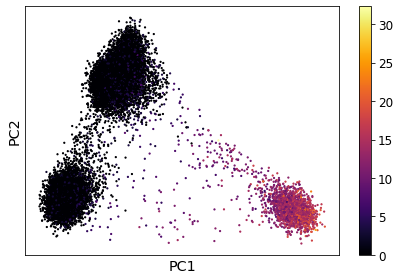

In [32]:
scprep.plot.scatter(x=data_pca[:,0], y=data_pca[:,1], c=data['Apoe'], label_prefix="PC", ticks=False)

### Exercise 3 - find the top genes associated with PC2 and plot some of them on the PCA

In [33]:
# ==================
# find the top genes associated with PC2
top_genes = np.abs(pc_loadings.loc[1]).sort_values(ascending=False)
# ==================
top_genes.head()

Calm1     0.315911
Pcp2      0.245478
Malat1    0.180046
Trpm1     0.167485
Chgb      0.160912
Name: 1, dtype: float64

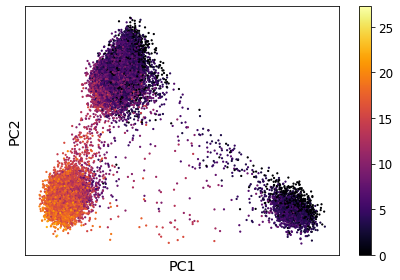

In [34]:
# ==================
# plot the result with scprep
scprep.plot.scatter(x=data_pca[:,0], y=data_pca[:,1], c=data['Calm1'], label_prefix="PC", ticks=False)
# ==================

### Exercise 4 - identify cell type markers with PCA

In [35]:
# =============
# examine the loadings of the principal component(s) that you used to identify your 
# cell type of choice and color the PCA plot by the top genes
# PC4
top_genes = np.abs(pc_loadings.loc[3]).sort_values(ascending=False)
top_genes

# =============

Atp2b1     2.711579e-01
Pcp2       1.832379e-01
Pcp4       1.797281e-01
Calm1      1.754337e-01
Gng13      1.749289e-01
               ...     
Hacl1      1.180521e-07
H2-M5      8.226844e-08
Cd274      7.882395e-08
Slc16a9    2.015971e-08
Ppp1r35    1.695727e-08
Name: 3, Length: 15524, dtype: float64

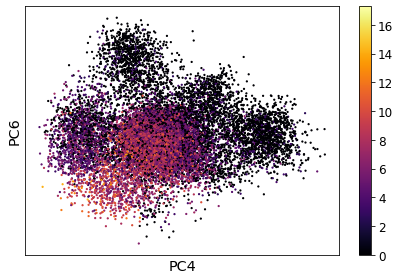

In [36]:
scprep.plot.scatter(x=data_pca[:,3], y=data_pca[:,5], c=data['Pcp4'], xlabel="PC4", ylabel="PC6", ticks=False)

In [38]:
# PC5
top_genes = np.abs(pc_loadings.loc[4]).sort_values(ascending=False)
top_genes
# =============

Xist             3.541282e-01
Malat1           2.493470e-01
mt-Rnr2          2.407910e-01
Trpm1            2.098022e-01
Pcp4             1.254546e-01
                     ...     
Atl1             9.989723e-08
B230319C09Rik    8.695070e-08
9330159N05Rik    8.450821e-08
1700034P13Rik    4.785452e-08
Gm37124          3.620214e-08
Name: 4, Length: 15524, dtype: float64

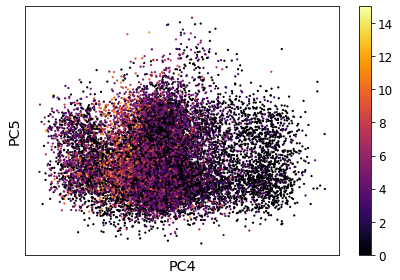

In [39]:
scprep.plot.scatter(x=data_pca[:,3], y=data_pca[:,4], c=data['Scg2'], xlabel="PC4", ylabel="PC5", ticks=False)

### Discussion
1. What level of granularity did we see in the dataset when visualizing the first two principal components?

A separation into cone bipolar, rod bipolar, and amarcine cells.


Later PCs might capture variance in the data in more than just the first 2 linear directions.